In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



In [2]:
df_cal = pd.read_csv('./calendar.csv')
df_list = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')


In [3]:
print(df_list.shape)
print(df_cal.shape)
print(df_rev.shape)


(3818, 92)
(1393570, 4)
(84849, 6)


In [4]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
print(df_cal.head())
print(df_cal.info())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [6]:
print(df_rev.head())
print(df_rev.info())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  

In [7]:
# Define sheet id and base url
sheet_id = "1M_qah-ym6O8vDcSmoKAP-lbZRPHUey83R_DJaW3LXfs"
base_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet="

In [8]:
# Load metadata for three datasets
listings_metadata = pd.read_csv(base_url+"listings")
calendar_metadata = pd.read_csv(base_url+"calendar")
reviews_metadata = pd.read_csv(base_url+"reviews")


In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [10]:
listings_metadata[['Label','Description','ML']]

,Label,Description,ML
0,id,"id is the primary key of table listings, the foreign key of table calendar and review",0
1,listing_url,listing url,0
2,scrape_id,scrape id,0
3,last_scraped,last scraped date,0
4,name,listing name,0
5,summary,summary of listing,0
6,space,description of listing space,0
7,description,description of listing,0
8,experiences_offered,if experiences offered,0
9,neighborhood_overview,overview of the neighborhood,0


In [11]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 50)

In [12]:
calendar_metadata[['Label','Description','ML']]


,Label,Description,ML
0,listing_id,listing_id is the foreigh key of table listings,1
1,date,365 days after last scraped date,1
2,available,Whether or not the listing is available for bo...,1
3,price,The future price for each day. \nThe price is ...,0


In [13]:
reviews_metadata[['Label','Description','ML']]

,Label,Description,ML
0,listing_id,listing id,1
1,id,review id,0
2,date,review date,1
3,reviewer_id,reviewer id,0
4,reviewer_name,reviewer name,0
5,comments,review content,0


In [14]:
df_rev['month_name']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month_name()

In [15]:
df_rev['month']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month

In [16]:
df_rev

,listing_id,id,date,reviewer_id,reviewer_name,comments,month_name,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,July,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,July,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",July,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,August,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,August,8
...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,October,10
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,October,10
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",October,10
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",November,11


In [17]:
df_rev_by_month=df_rev.groupby(['month_name','month']).id.nunique().reset_index().sort_values(['month'])

In [18]:
df_rev_by_month

,month_name,month,id
4,January,1,2867
3,February,2,2643
7,March,3,4158
0,April,4,4233
8,May,5,5854
...,...,...,...
1,August,8,13018
11,September,9,11677
10,October,10,8955
9,November,11,6665


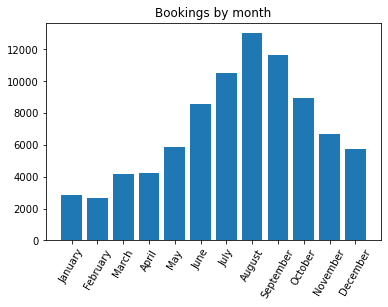

In [19]:
plt.bar(df_rev_by_month.month_name,df_rev_by_month.id);
plt.title('Bookings by month');
plt.xticks(rotation=60);

In [20]:
df_cal_prices=df_cal.dropna(subset='price',axis=0)

In [21]:
df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\3152835355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\3152835355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month


In [22]:
df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\289769154.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\289769154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')


In [23]:
df_cal_prices_monthly=df_cal_prices.groupby(['month_name','month']).mean()['price_num'].reset_index().sort_values(['month'])
#.reset_index().sort_values(['month'])

In [24]:
df_cal_prices_monthly

,month_name,month,price_num
4,January,1,122.912176
3,February,2,124.293927
7,March,3,128.644488
0,April,4,135.097005
8,May,5,139.538183
...,...,...,...
1,August,8,150.656594
11,September,9,143.255949
10,October,10,137.031939
9,November,11,135.688738


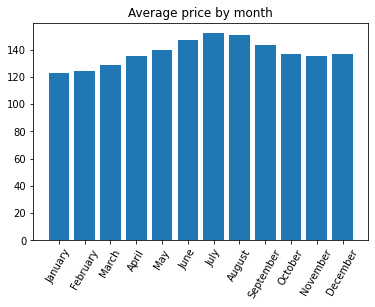

In [25]:
plt.bar(df_cal_prices_monthly.month_name,df_cal_prices_monthly.price_num);
plt.title('Average price by month');
plt.xticks(rotation=60);

In [26]:
print('Total bookings in August of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]),
print('Total bookings in January of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0])
print("That's an increase of ",round((list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]/
list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0]-1)*100,1),'%')


Total bookings in August of previous years:  13018
Total bookings in January of previous years:  2867
That's an increase of  354.1 %


In [27]:
print('Average price in August for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0],2)),
print('Average price in January for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0],2)),
print("That's an increase of ",round((list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0]/
list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0]-1)*100,1),'%')


Average price in August for current year: $ 150.66
Average price in January for current year: $ 122.91
That's an increase of  22.6 %


In [28]:
df_rev['year']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.year


In [29]:
df_rev[df_rev.year!=2016].groupby(['year']).listing_id.nunique()

year
2009       4
2010      35
2011      96
2012     232
2013     508
2014    1203
2015    3091
Name: listing_id, dtype: int64

In [30]:
df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\3495608446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()


In [31]:
df_rev_summary_year

,year,listing_id,id,reviewer_id
0,2009,4,17,16
1,2010,35,254,238
2,2011,96,1169,1107
3,2012,232,3251,3051
4,2013,508,7077,6644
5,2014,1203,20365,18928
6,2015,3091,52493,48089


In [32]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [33]:
years = np.arange(len(df_rev_summary_year['year']))
listings=df_rev_summary_year['listing_id']
reviews=df_rev_summary_year['id']
reviewers=df_rev_summary_year['reviewer_id']
width=0.2

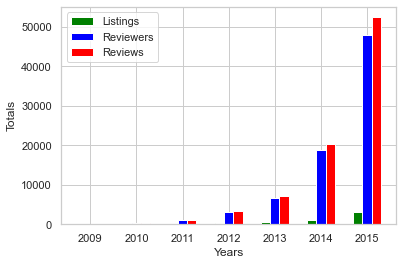

In [34]:
plt.bar(years-width, listings, width, color='green')
plt.bar(years, reviewers, width, color='blue')
plt.bar(years+width, reviews, width, color='red')

plt.xticks(years, list(df_rev_summary_year['year']))
plt.xlabel("Years")
plt.ylabel("Totals")
plt.legend(["Listings","Reviewers", "Reviews" ])

plt.show()

In [35]:
df_rev_pct_change_temp=df_rev_summary_year.set_index('year').pct_change()*100

In [36]:
df_rev_pct_change_temp_rounded=round(df_rev_pct_change_temp,0)

In [37]:
df_rev_pct_change_temp_rounded

,listing_id,id,reviewer_id
year,,,
2009,NaN,NaN,NaN
2010,775.0,1394.0,1388.0
2011,174.0,360.0,365.0
2012,142.0,178.0,176.0
2013,119.0,118.0,118.0
2014,137.0,188.0,185.0
2015,157.0,158.0,154.0


In [38]:
df_rev_pct_change=df_rev_pct_change_temp_rounded.reset_index()[1:]

In [39]:
df_rev_pct_change

,year,listing_id,id,reviewer_id
1,2010,775.0,1394.0,1388.0
2,2011,174.0,360.0,365.0
3,2012,142.0,178.0,176.0
4,2013,119.0,118.0,118.0
5,2014,137.0,188.0,185.0
6,2015,157.0,158.0,154.0


In [40]:
years_2 = np.arange(len(df_rev_pct_change['year']))
listings_2=df_rev_pct_change['listing_id']
reviews_2=df_rev_pct_change['id']
reviewers_2=df_rev_pct_change['reviewer_id']
width=0.2

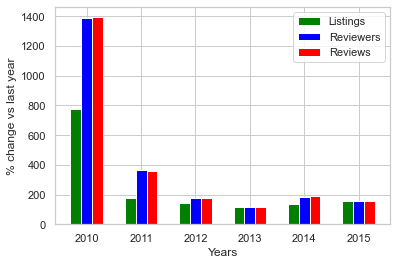

In [41]:
plt.bar(years_2-width, listings_2, width, color='green')
plt.bar(years_2, reviewers_2, width, color='blue')
plt.bar(years_2+width, reviews_2, width, color='red')

plt.xticks(years_2, list(df_rev_pct_change['year']))
plt.xlabel("Years")
plt.ylabel("% change vs last year")
plt.legend(["Listings","Reviewers", "Reviews" ])

plt.show()

In [42]:
df_list_prices=df_list

In [43]:
df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_2244\1193763243.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')


In [46]:
print(df_list_prices['is_location_exact'].value_counts())

pd.set_option('display.max_rows', None)

print(df_list_prices['is_location_exact'].value_counts().cumsum().reset_index())

pd.set_option('display.max_rows', 10)


t    3412
f     406
Name: is_location_exact, dtype: int64
  index  is_location_exact
0     t               3412
1     f               3818


In [47]:
df_list_exact_loc=df_list_prices.groupby(['is_location_exact']).mean()['price_num'].reset_index()

In [48]:
df_list_exact_loc

,is_location_exact,price_num
0,f,123.775862
1,t,128.475967


In [49]:
independent_variables=['price_num','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_group_cleansed','property_type',
                       'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit',
                       'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','availability_30',
                       'availability_60','availability_90','availability_365','number_of_reviews',
                       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                       'review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
                       'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','reviews_per_month',
                       'is_location_exact'
                      ]

In [50]:
df_list_prices=df_list_prices[independent_variables]

In [51]:
df_list_prices

,price_num,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_location_exact
0,85.0,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,t
1,150.0,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,f,strict,t,t,1.48,t
2,975.0,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,1.15,t
3,100.0,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN,t
4,450.0,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,10.0,10.0,9.0,9.0,f,strict,f,f,0.89,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,99%,100%,f,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,...,4.0,8.0,10.0,8.0,f,strict,f,f,0.30,t
3814,79.0,100%,100%,f,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,f,moderate,f,f,2.00,t
3815,93.0,NaN,NaN,f,Rainier Valley,House,Entire home/apt,2,1.0,1.0,...,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN,f
3816,99.0,100%,NaN,f,Capitol Hill,Condominium,Entire home/apt,2,1.0,0.0,...,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN,f


In [52]:
df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0)
               

,price_num,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_location_exact
0,85.0,96%,100%,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,9.0,10.0,f,moderate,f,f,4.07,t
1,150.0,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,f,strict,t,t,1.48,t
2,975.0,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,1.15,t
3,100.0,NaN,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN,t
4,450.0,100%,NaN,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,10.0,10.0,9.0,9.0,f,strict,f,f,0.89,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,99%,100%,f,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,...,4.0,8.0,10.0,8.0,f,strict,f,f,0.30,t
3814,79.0,100%,100%,f,Capitol Hill,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,f,moderate,f,f,2.00,t
3815,93.0,NaN,NaN,f,Rainier Valley,House,Entire home/apt,2,1.0,1.0,...,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN,f
3816,99.0,100%,NaN,f,Capitol Hill,Condominium,Entire home/apt,2,1.0,0.0,...,NaN,NaN,NaN,NaN,f,moderate,f,f,NaN,f


In [53]:
df_list_prices=df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0)
               

In [54]:
df_list_prices.dropna(subset=['host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights'],axis=0)

,price_num,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,is_location_exact
1,150.0,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,10.0,f,strict,t,t,1.48,t
2,975.0,67%,100%,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,1.15,t
7,60.0,100%,100%,t,Queen Anne,Cabin,Private room,2,1.0,1.0,...,10.0,10.0,9.0,10.0,f,strict,t,t,4.73,t
9,150.0,98%,100%,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,9.0,f,strict,t,t,1.55,t
11,99.0,100%,100%,f,Queen Anne,House,Entire home/apt,2,1.0,1.0,...,9.0,10.0,10.0,9.0,f,strict,f,f,0.98,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,125.0,100%,100%,t,Other neighborhoods,Apartment,Entire home/apt,2,1.0,0.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,2.34,t
3805,100.0,100%,100%,f,Other neighborhoods,Apartment,Entire home/apt,6,1.0,2.0,...,10.0,10.0,10.0,10.0,f,strict,f,f,3.95,t
3808,175.0,100%,100%,f,Other neighborhoods,House,Entire home/apt,6,2.0,3.0,...,10.0,10.0,10.0,9.0,f,strict,f,f,1.15,t
3810,154.0,100%,100%,f,Other neighborhoods,House,Entire home/apt,5,1.0,2.0,...,10.0,10.0,10.0,8.0,f,strict,f,f,1.56,t


In [55]:
num_vars=['price_num','host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights']

In [56]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [57]:
df_list_prices[num_vars].corr()

,price_num,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,accommodates,guests_included,minimum_nights,maximum_nights
price_num,1.000000,0.516703,0.628138,0.589924,-0.037223,-0.048817,-0.058222,-0.014980,-0.124598,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,-0.218588,0.652665,0.393150,0.017329,-0.003448
bathrooms,0.516703,1.000000,0.611097,0.532818,-0.039637,-0.049650,-0.057543,-0.002632,-0.092372,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,-0.167894,0.538433,0.304736,0.006344,-0.015356
bedrooms,0.628138,0.611097,1.000000,0.753186,-0.076030,-0.089763,-0.102864,-0.050598,-0.105771,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,-0.230287,0.770980,0.456923,0.011950,-0.008747
beds,0.589924,0.532818,0.753186,1.000000,-0.028515,-0.036453,-0.047677,-0.010343,-0.089263,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,-0.149079,0.861086,0.460412,0.002654,-0.009156
availability_30,-0.037223,-0.039637,-0.076030,-0.028515,1.000000,0.936058,0.875737,0.504492,0.074444,-0.051439,-0.057468,0.009053,-0.040999,-0.030698,-0.041912,-0.091919,0.053386,-0.043089,-0.045303,0.013186,0.012441
availability_60,-0.048817,-0.049650,-0.089763,-0.036453,0.936058,1.000000,0.973390,0.573426,0.098890,-0.048460,-0.048278,0.013997,-0.032774,-0.035334,-0.050093,-0.083797,0.106876,-0.048761,-0.046948,0.010262,-0.009057
availability_90,-0.058222,-0.057543,-0.102864,-0.047677,0.875737,0.973390,1.000000,0.619691,0.105107,-0.038022,-0.031379,0.020951,-0.022887,-0.032842,-0.050059,-0.077367,0.123269,-0.060573,-0.047177,0.009046,-0.002757
availability_365,-0.014980,-0.002632,-0.050598,-0.010343,0.504492,0.573426,0.619691,1.000000,0.093946,-0.038600,-0.039761,-0.022539,-0.013510,-0.021564,-0.034956,-0.066565,0.002312,-0.032166,-0.049416,0.009047,0.007229
number_of_reviews,-0.124598,-0.092372,-0.105771,-0.089263,0.074444,0.098890,0.105107,0.093946,1.000000,0.036242,0.066618,0.055609,0.089449,0.072957,-0.009188,0.044110,0.561438,-0.073158,0.028000,-0.013840,-0.081635
review_scores_rating,0.055551,0.045101,0.023257,-0.000720,-0.051439,-0.048460,-0.038022,-0.038600,0.036242,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.087313,-0.013101,-0.001430,0.001392,-0.031313


In [58]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [59]:
#sns.heatmap(df_list_prices[num_vars].corr(), annot=True, fmt=".2f");

In [60]:
num_vars_2=['price_num','bedrooms','number_of_reviews']
                              

In [74]:
num_vars_3=['bedrooms','number_of_reviews']


In [61]:
df_list_prices[num_vars_2].corr()

,price_num,bedrooms,number_of_reviews
price_num,1.000000,0.628138,-0.124598
bedrooms,0.628138,1.000000,-0.105771
number_of_reviews,-0.124598,-0.105771,1.000000


In [62]:
cat_vars=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']

In [63]:
for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_list_prices = pd.concat([df_list_prices.drop(var, axis=1), pd.get_dummies(df_list_prices[var], prefix=var, prefix_sep='_')], axis=1)
    

In [64]:
df_list_prices.drop(['host_acceptance_rate','bathrooms','beds','availability_30','availability_60','availability_90','availability_365',
                     'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                     'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','host_response_rate',
                     'accommodates','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
                     'maximum_nights'],axis=1,inplace=True)

In [68]:
df_list_prices.dropna(subset=num_vars_2,axis=0,inplace=True)

In [71]:
y=df_list_prices['price_num']
X=df_list_prices.drop(['price_num'],axis=1)

In [72]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

    

c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [73]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5508444680471313.  The rsquared on the test data was -1.239683540223447e+22.


In [78]:
X2=df_list_prices[num_vars_3]


In [79]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X2_train, y2_train) #Fit

#Predict using your model
y2_test_preds = lm_model.predict(X2_test)
y2_train_preds = lm_model.predict(X2_train)

#Score using your model
test_score = r2_score(y2_test, y2_test_preds)
train_score = r2_score(y2_train, y2_train_preds)


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [80]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.3989135084603903.  The rsquared on the test data was 0.39554074990083854.


In [83]:
print(lm_model.fit(X2_train, y2_train).coef_)
print(lm_model.fit(X2_train, y2_train).intercept_)


[62.68345    -0.14729674]
48.96391374915629


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i